In [192]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
#import pandas as pd
import statistics as st

In [66]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

In [154]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [155]:
mpl.rcParams["xtick.color"] = "white"
mpl.rcParams["ytick.color"] = "white"
mpl.rcParams["axes.labelcolor"] = "white"
#mpl.rcParams["text.color"] = "white"
mpl.rcParams["axes.titlecolor"] = "white"
mpl.rcParams["figure.facecolor"] = (0,0,0,0)
#mpl.rcParams["figure.edgecolor"] = (0,0,0,1)
#mpl.rcParams["axes.facecolor"] = "black"
#mpl.rcParams["axes.edgecolor"] = "white"
mpl.rcParams["figure.figsize"] = [10.0, 6.0]
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "gray"

In [2]:
LINE_CLASS = 20
LINE_TIME = 23
RESULTS_PATH = "./results"

In [3]:
def get_time_results(prefix, line_time):
    filenames = glob.glob(prefix)
    result_times = [ 0.0 for _ in range(30) ]
    for filename in filenames:
        result_id = int(filename.split("/")[-1].split(".")[3])
        text = ""
        with open(filename, "r") as reader:
            text = reader.read()
        text = text.split("\n")
        result_times[result_id - 1] = float(text[line_time].split("=")[-1].strip())
    return result_times

In [4]:
ep_serial_s = get_time_results("./results/ep.S.1.*", 23)
ep_serial_w = get_time_results("./results/ep.W.1.*", 23)
ep_serial_a = get_time_results("./results/ep.A.1.*", 23)
ep_pp_s_1 = get_time_results("./results/ep-pp.S.1.*", 23)
ep_pp_s_4 = get_time_results("./results/ep-pp.S.4.*", 23)
ep_pp_s_8 = get_time_results("./results/ep-pp.S.8.*", 23)
ep_pp_w_1 = get_time_results("./results/ep-pp.W.1.*", 23)
ep_pp_w_4 = get_time_results("./results/ep-pp.W.4.*", 23)
ep_pp_w_8 = get_time_results("./results/ep-pp.W.8.*", 23)
ep_pp_a_1 = get_time_results("./results/ep-pp.A.1.*", 23)
ep_pp_a_4 = get_time_results("./results/ep-pp.A.4.*", 23)
ep_pp_a_8 = get_time_results("./results/ep-pp.A.8.*", 23)

In [5]:
#ep_serial_s_cpp = get_time_results("./results_serial_cpp/ep.S.*", 28)
#ep_serial_w_cpp = get_time_results("./results_serial_cpp/ep.W.*", 28)

#ep_pp_s_1_cpp = get_time_results("./results_cpp/ep.S.1.*", 29)
ep_pp_s_8_cpp = get_time_results("./results_cpp/ep.S.8.*", 29)
#ep_pp_w_1_cpp = get_time_results("./results_cpp/ep.W.1.*", 29)
ep_pp_w_8_cpp = get_time_results("./results_cpp/ep.W.8.*", 29)
ep_pp_a_8_cpp = get_time_results("./results_cpp/ep.A.8.*", 29)

In [6]:
#ep_pp_s_1_fortran = get_time_results("./results_fortran/ep.S.1.*", 30)
ep_pp_s_8_fortran = get_time_results("./results_fortran/ep.S.8.*", 30)
#ep_pp_w_1_fortran = get_time_results("./results_fortran/ep.W.1.*", 30)
ep_pp_w_8_fortran = get_time_results("./results_fortran/ep.W.8.*", 30)
ep_pp_a_8_fortran = get_time_results("./results_fortran/ep.A.8.*", 30)

In [8]:
results = {
    "EP Serial S":ep_serial_s,
    "EP Parallel S 1 Thread":ep_pp_s_1,
    "EP Parallel S 8 Thread":ep_pp_s_8,
}

In [9]:
results_fortran = {
    "EP Parallel S 1 Thread Fortran":ep_pp_s_1_fortran,
    "EP Parallel S 8 Thread Fortran":ep_pp_s_8_fortran,
    "EP Parallel W 1 Thread Fortran":ep_pp_w_1_fortran,
    "EP Parallel W 8 Thread Fortran":ep_pp_w_8_fortran,
}

In [10]:
results_cpp = {
    "EP Serial S CPP":ep_serial_s_cpp,
    "EP Serial W CPP":ep_serial_w_cpp,
    "EP Parallel S 1 Thread CPP":ep_pp_s_1_cpp,
    "EP Parallel S 8 Thread CPP":ep_pp_s_8_cpp,
    "EP Parallel W 1 Thread CPP":ep_pp_w_1_cpp,
    "EP Parallel W 8 Thread CPP":ep_pp_w_8_cpp,
}

In [11]:
results

{'EP Serial S': [2.208081902,
  2.199819496,
  2.214329593,
  2.270136316,
  2.223468031,
  2.217350774,
  2.227860613,
  2.244762227,
  2.29281452,
  2.24492084,
  2.28968905,
  2.342352295,
  2.298318192,
  2.279870165,
  2.232129356,
  2.27978363,
  2.341368949,
  2.253471427,
  2.218255625,
  2.230901003,
  2.211213157,
  2.209549315,
  2.217798177,
  2.224045958,
  2.230340658,
  2.217493442,
  2.231083282,
  2.239768052,
  2.24988553,
  2.256662354],
 'EP Parallel S 1 Thread': [2.245046162,
  2.307085204,
  2.249469059,
  2.247185665,
  2.274213913,
  2.243008857,
  2.238894002,
  2.242731955,
  2.258224393,
  2.335213536,
  2.238277411,
  2.260194289,
  2.258255475,
  2.353831022,
  2.285788867,
  2.262614062,
  2.242327289,
  2.256423881,
  2.293693565,
  2.3299171530000002,
  2.3073008760000002,
  2.246555591,
  2.293772736,
  2.318923874,
  2.304617268,
  2.315903386,
  2.274607258,
  2.290562123,
  2.246416761,
  2.272928864],
 'EP Parallel S 8 Thread': [0.349215655,
  0.350

In [263]:
x = range(1,31)

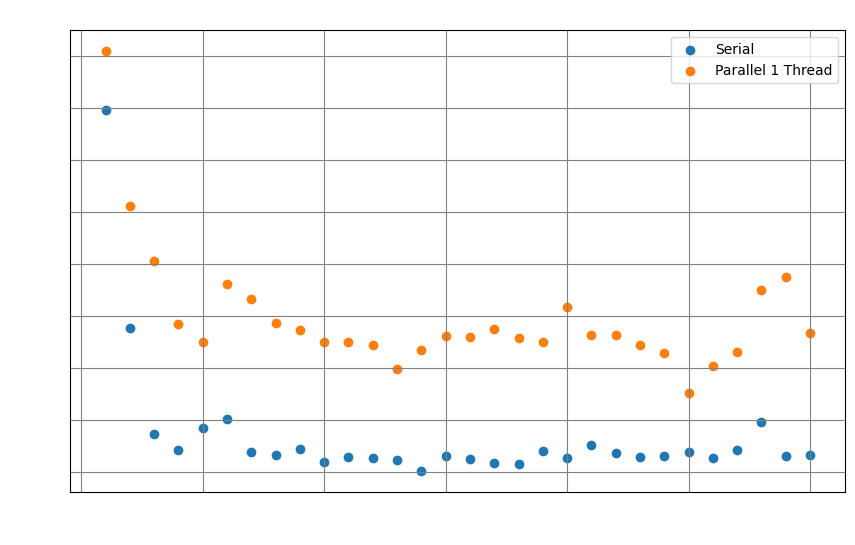

In [158]:
plt.scatter(x, ep_serial_s, label="Serial")
plt.scatter(x, ep_pp_s_1, label="Parallel 1 Thread")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP S Rust")
plt.show()

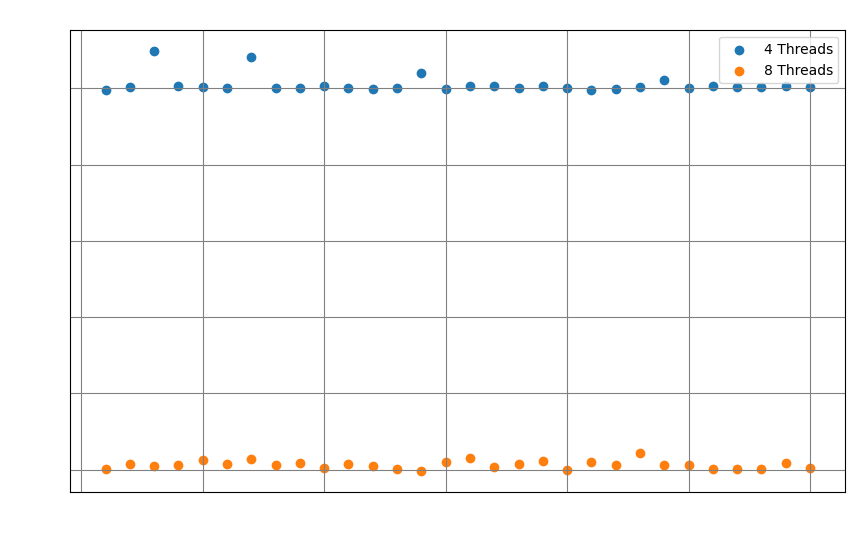

In [156]:
#plt.scatter(x, ep_pp_s_1, label="EP Parallel S 1 Threads")
plt.scatter(x, ep_pp_s_4, label="4 Threads")
plt.scatter(x, ep_pp_s_8, label="8 Threads")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP Parallel S Rust")
plt.show()

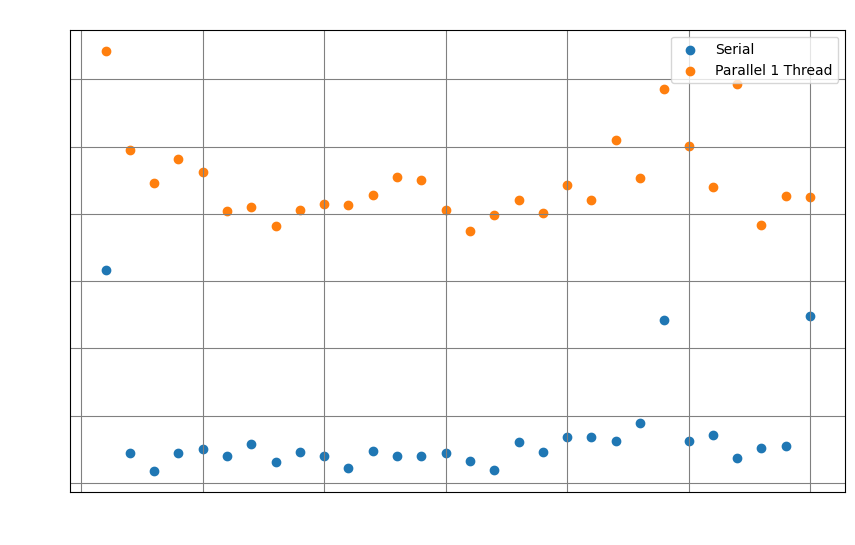

In [159]:
plt.scatter(x, ep_serial_w, label="Serial")
plt.scatter(x, ep_pp_w_1, label="Parallel 1 Thread")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP W Rust")
plt.show()

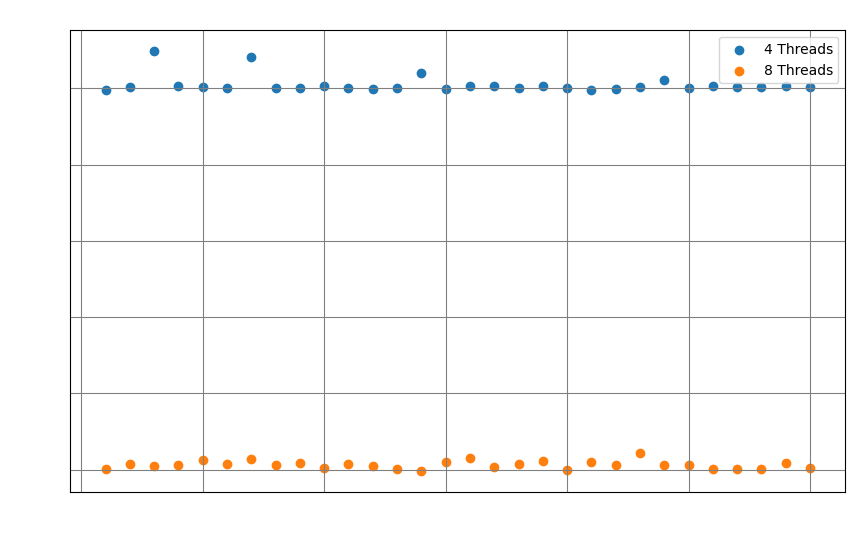

In [160]:
plt.scatter(x, ep_pp_s_4, label="4 Threads")
plt.scatter(x, ep_pp_s_8, label="8 Threads")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP Parallel W Rust")
plt.show()

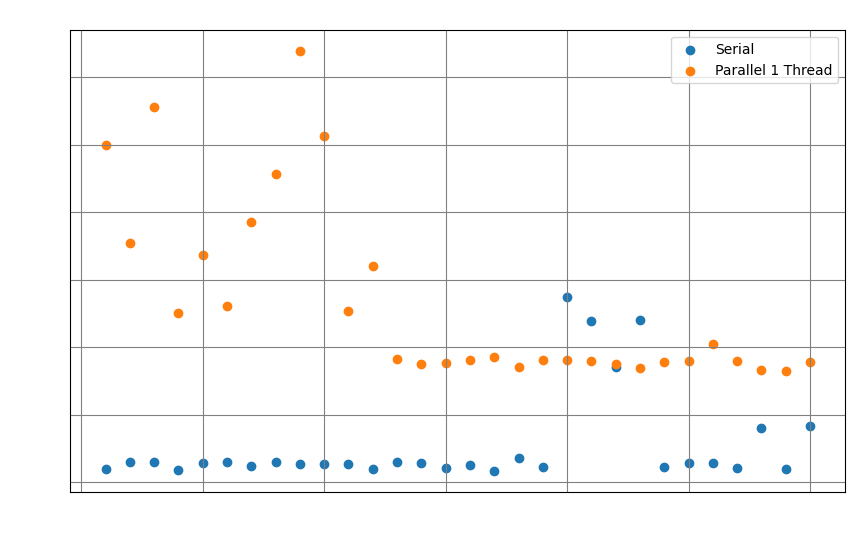

In [164]:
plt.scatter(x, ep_serial_a, label="Serial")
plt.scatter(x, ep_pp_a_1, label="Parallel 1 Thread")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP A Rust")
plt.show()

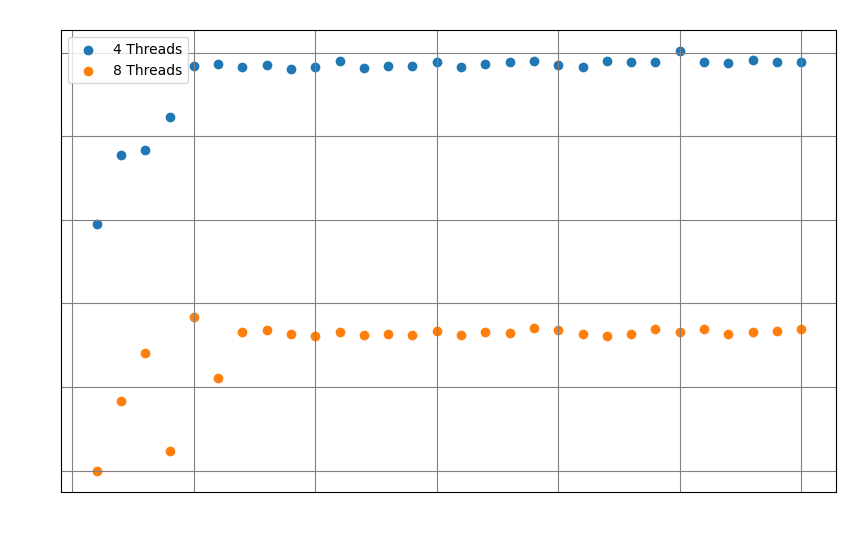

In [165]:
plt.scatter(x, ep_pp_a_4, label="4 Threads")
plt.scatter(x, ep_pp_a_8, label="8 Threads")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP Parallel A Rust")
plt.show()

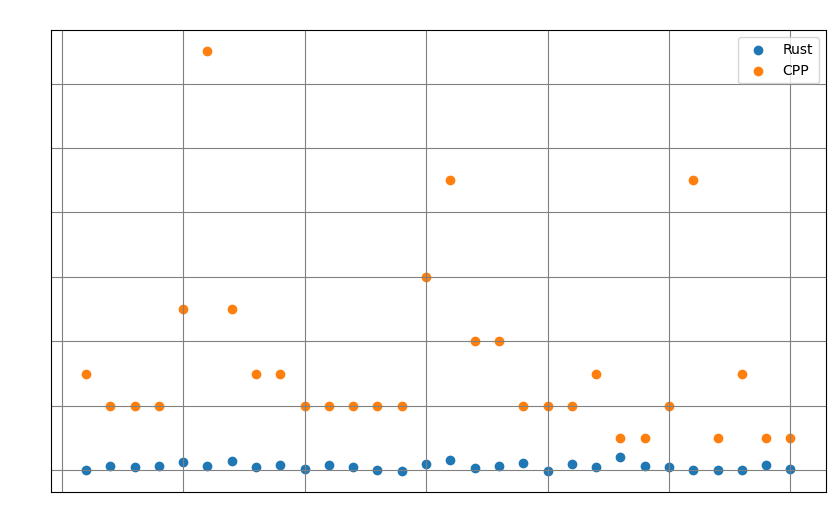

In [272]:
plt.scatter(x, ep_pp_s_8, label="Rust")
plt.scatter(x, ep_pp_s_8_cpp, label="CPP")
plt.legend()
plt.title("EP Parallel S 8 Threads")
#plt.tick_params(axis="x", colors="white")
#plt.tick_params(axis="y", colors="white")
plt.show()

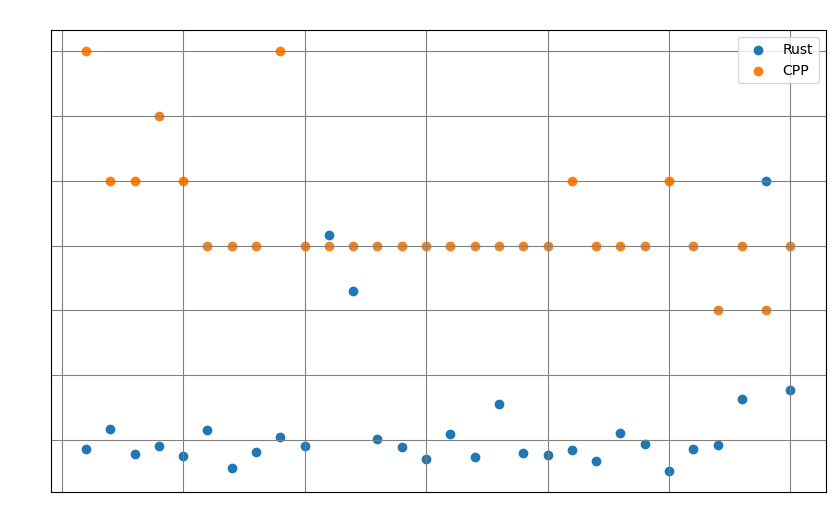

In [274]:
plt.scatter(x, ep_pp_w_8, label="Rust")
plt.scatter(x, ep_pp_w_8_cpp, label="CPP")
plt.legend()
plt.title("EP Parallel W 8 Threads")
#plt.tick_params(axis="x", colors="white")
#plt.tick_params(axis="y", colors="white")
plt.show()

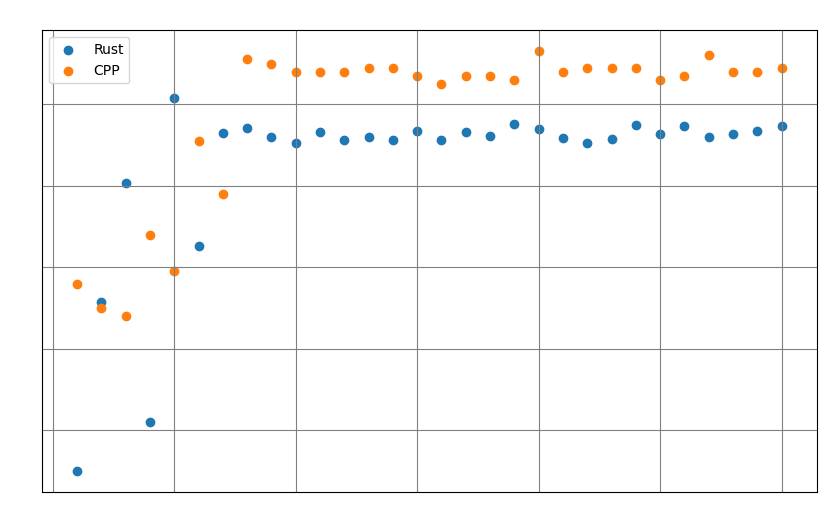

In [275]:
plt.scatter(x, ep_pp_a_8, label="Rust")
plt.scatter(x, ep_pp_a_8_cpp, label="CPP")
plt.legend()
plt.title("EP Parallel A 8 Threads")
plt.show()

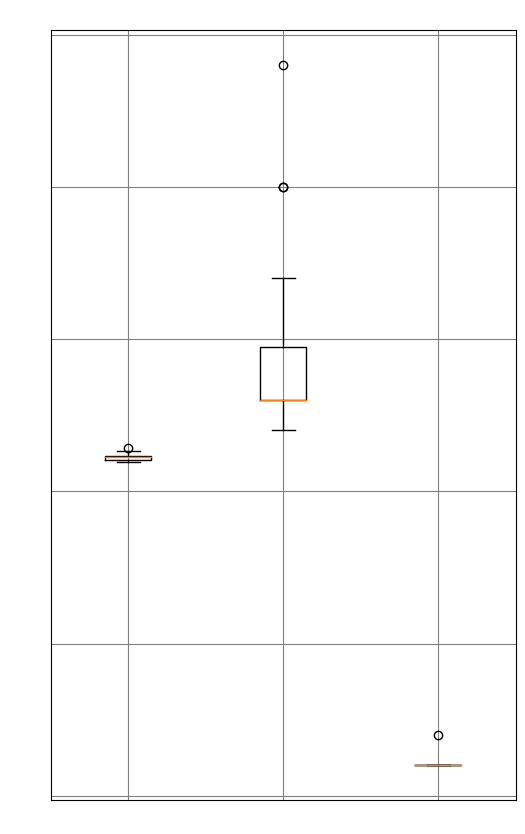

In [261]:
plt.figure(figsize=(6,10))
plt.boxplot([ep_pp_s_8, ep_pp_s_8_cpp, ep_pp_s_8_fortran], labels=["Rust", "CPP", "Fortran"])
plt.title("EP Parallel S 8 Threads")
plt.show()

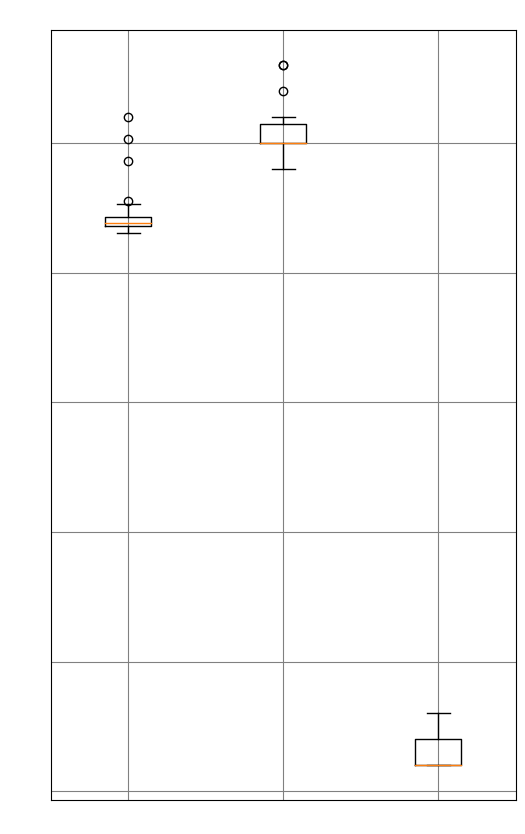

In [260]:
plt.figure(figsize=(6,10))
plt.boxplot([ep_pp_w_8, ep_pp_w_8_cpp, ep_pp_w_8_fortran], labels=["Rust", "CPP", "Fortran"])
plt.title("EP Parallel W 8 Threads")
plt.show()

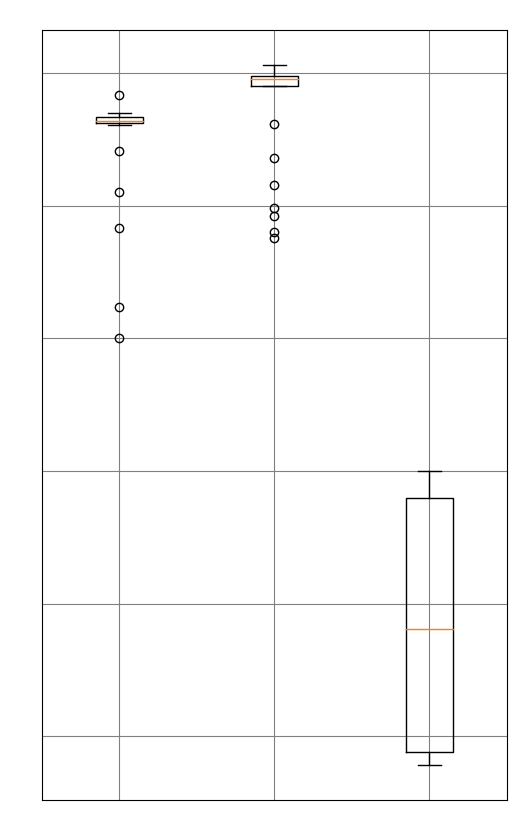

In [262]:
plt.figure(figsize=(6,10))
plt.boxplot([ep_pp_a_8, ep_pp_a_8_cpp, ep_pp_a_8_fortran], labels=["Rust", "CPP", "Fortran"])
plt.title("EP Parallel A 8 Threads")
plt.show()

In [57]:
st.median(ep_pp_s_8)

0.161170374

In [16]:
st.median(ep_pp_s_8_cpp)

0.18

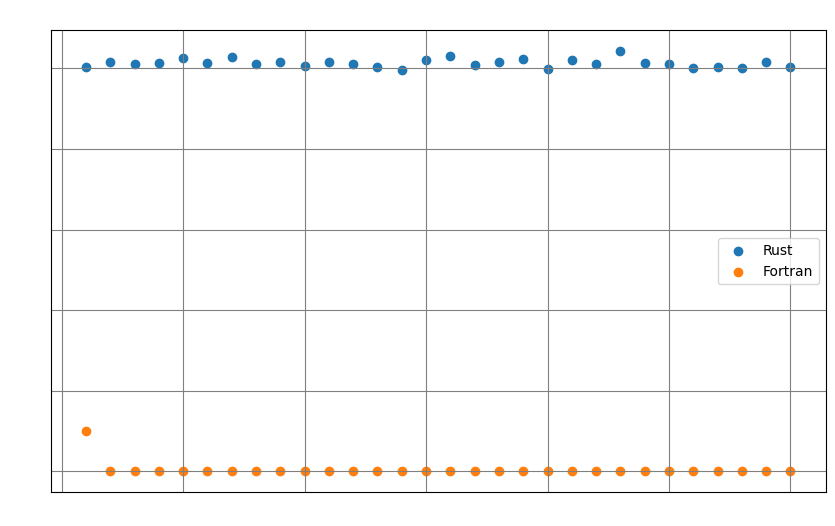

In [268]:
#plt.figure(figsize=(8, 4))
plt.scatter(x, ep_pp_s_8, label="Rust")
plt.scatter(x, ep_pp_s_8_fortran, label="Fortran")
plt.legend()
plt.title("EP Parallel S 8 Threads")
plt.show()

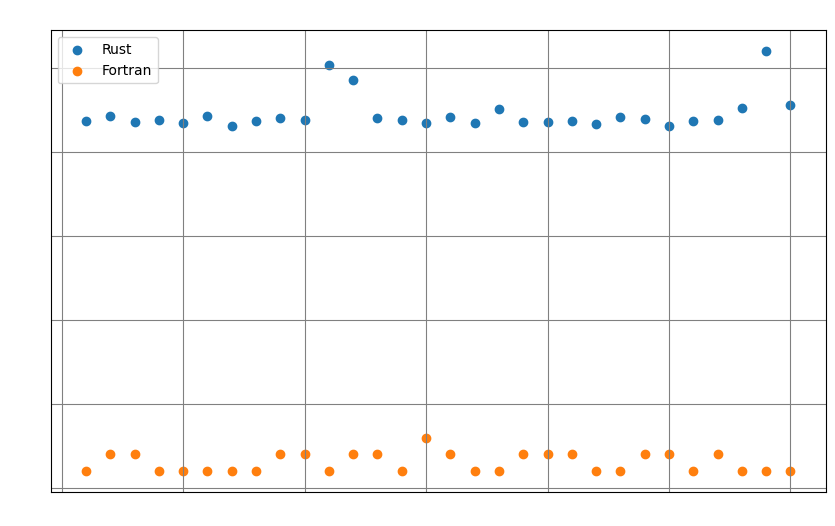

In [269]:
plt.scatter(x, ep_pp_w_8, label="Rust")
plt.scatter(x, ep_pp_w_8_fortran, label="Fortran")
plt.legend()
plt.title("EP Parallel W 8 Threads")
plt.show()

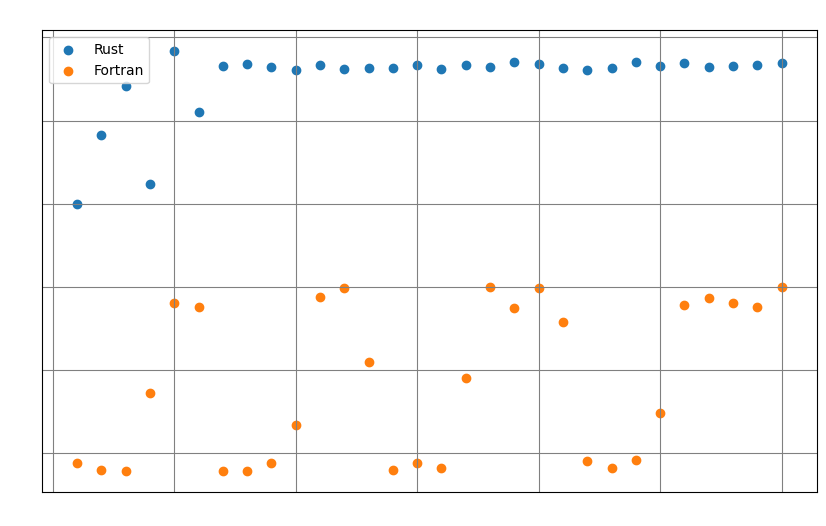

In [270]:
plt.scatter(x, ep_pp_a_8, label="Rust")
plt.scatter(x, ep_pp_a_8_fortran, label="Fortran")
plt.legend()
plt.title("EP Parallel A 8 Threads")
plt.show()

In [ ]:
fig, ax = plt.subplots(4,1)
keys = list(results.keys())
values = list(results.values())
colors = ["orange", "blue", "green", "red"]

for i in range(4):
    label_ = keys[i]
    y = values[i]
    
    y_min = min(y)
    y_max = max(y)
    margin = 0.05

    ax[i].plot(x, y, color=colors[i])
    ax[i].set_title(label_)
    ax[i].set_xlabel("Execution")
    ax[i].set_ylabel("Milisseconds")
    ax[i].set_ylim([y_min * (1-margin), y_max * (1+margin)])

plt.subplots_adjust(bottom=15, top=20)
plt.show()

In [59]:
plt.boxplot(list(results.values()))
plt.ylabel("Milliseconds")
#plt.ylim([0.0, 2.5])
plt.show()

NameError: name 'results' is not defined

In [35]:
makespan_serial_s = st.median(ep_serial_s)
makespan_serial_w = st.median(ep_serial_w)
makespan_serial_a = st.median(ep_serial_a)
makespan_parallel_s_1 = st.median(ep_pp_s_1)
makespan_parallel_s_4 = st.median(ep_pp_s_4)
makespan_parallel_s_8 = st.median(ep_pp_s_8)
makespan_parallel_w_1 = st.median(ep_pp_w_1)
makespan_parallel_w_4 = st.median(ep_pp_w_4)
makespan_parallel_w_8 = st.median(ep_pp_w_8)
makespan_parallel_a_1 = st.median(ep_pp_a_1)
makespan_parallel_a_4 = st.median(ep_pp_a_4)
makespan_parallel_a_8 = st.median(ep_pp_a_8)

In [195]:
print(makespan_serial_s)
print(makespan_parallel_s_1)

0.8933139545
0.9162363865


In [36]:
overhead_s = makespan_parallel_s_1 - makespan_serial_s
overhead_w = makespan_parallel_w_1 - makespan_serial_w
overhead_a = makespan_parallel_a_1 - makespan_serial_a
print(overhead_s)
print(overhead_w)
print(overhead_a)

0.022922432000000104
0.03808510299999979
0.30874844700000104


In [40]:
speed_up_s_8 = makespan_serial_s / makespan_parallel_s_8
speed_up_w_8 = makespan_serial_w / makespan_parallel_w_8
speed_up_a_8 = makespan_serial_a / makespan_parallel_a_8

speed_up_s_4 = makespan_serial_s / makespan_parallel_s_4
speed_up_w_4 = makespan_serial_w / makespan_parallel_w_4
speed_up_a_4 = makespan_serial_a / makespan_parallel_a_4

print(speed_up_s_8)
print(speed_up_w_8)
print(speed_up_a_8)

print(speed_up_s_4)
print(speed_up_w_4)
print(speed_up_a_4)

5.542668496258499
5.592997511769027
4.293073905161129
3.430466953450965
3.436514644731557
2.891249015043454


In [41]:
eficiencia_s_8 = speed_up_s_8 / 8
eficiencia_w_8 = speed_up_w_8 / 8
eficiencia_a_8 = speed_up_a_8 / 8

eficiencia_s_4 = speed_up_s_4 / 4
eficiencia_w_4 = speed_up_w_4 / 4
eficiencia_a_4 = speed_up_a_4 / 4

print(eficiencia_s_8)
print(eficiencia_w_8)
print(eficiencia_a_8)

print(eficiencia_s_4)
print(eficiencia_w_4)
print(eficiencia_a_4)

0.6928335620323124
0.6991246889711283
0.5366342381451411
0.8576167383627412
0.8591286611828892
0.7228122537608636


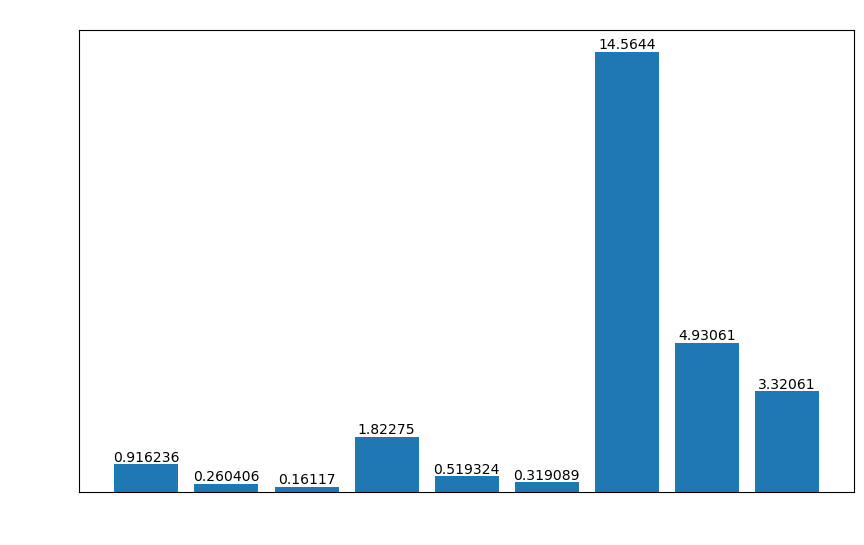

In [248]:
x = ["S 1", "S 4", "S 8", "W 1", "W 4", "W 8", "A 1", "A 4", "A 8"]
y = [makespan_parallel_s_1, makespan_parallel_s_4, makespan_parallel_s_8, makespan_parallel_w_1, makespan_parallel_w_4, makespan_parallel_w_8, makespan_parallel_a_1, makespan_parallel_a_4, makespan_parallel_a_8]
plt.title("Parallel makespan")
fig = plt.bar(x, y)
plt.xlabel("Threads")
plt.ylabel("Seconds")
plt.grid(False)
plt.yticks(np.arange(min(y) * 0.9, max(y) * 1.1, 1))
plt.bar_label(fig, label_type="edge")
plt.show()

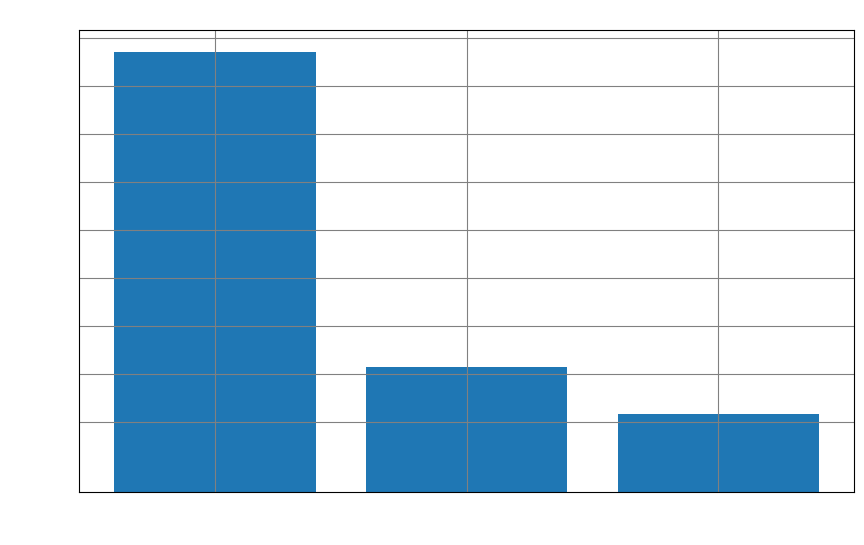

In [215]:
y = [makespan_parallel_s_1, makespan_parallel_s_4, makespan_parallel_s_8]
plt.title("Parallel makespan S")
plt.bar(["1", "4", "8"], y)
plt.xlabel("Threads")
plt.ylabel("Seconds")
plt.yticks(np.arange(min(y) * 0.9, max(y) * 1.1, 0.1))
plt.show()

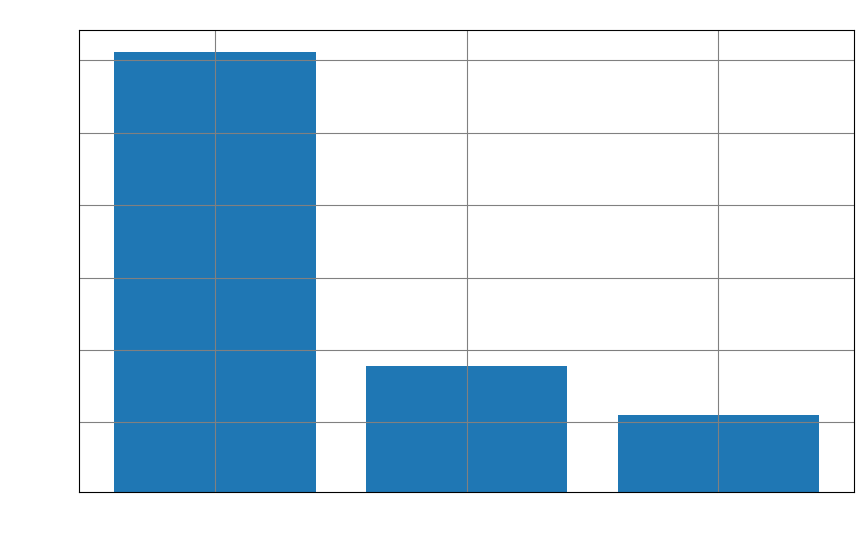

In [220]:
y = [makespan_parallel_w_1, makespan_parallel_w_4, makespan_parallel_w_8]
plt.title("Parallel makespan W")
plt.bar(["1", "4", "8"], y)
plt.xlabel("Threads")
plt.ylabel("Seconds")
plt.yticks(np.arange(min(y) * 0.9, max(y) * 1.1, 0.3))
plt.show()

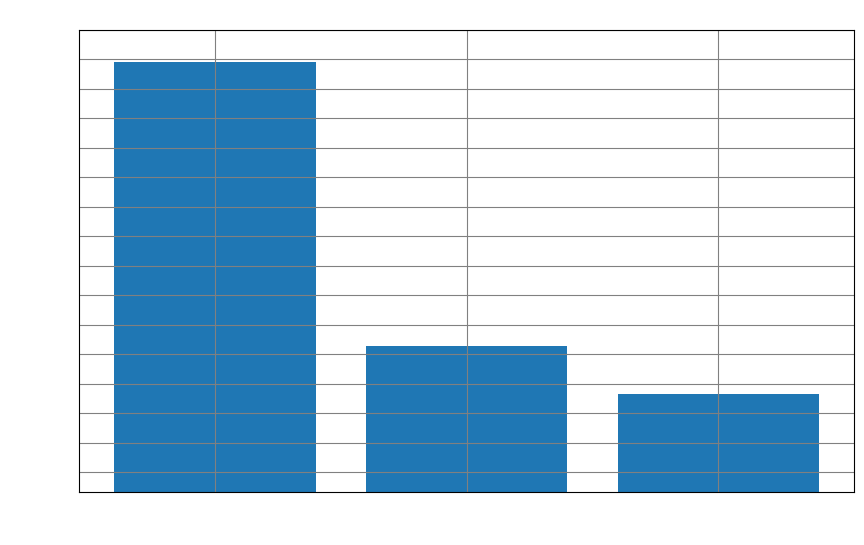

In [225]:
y = [makespan_parallel_a_1, makespan_parallel_a_4, makespan_parallel_a_8]
plt.title("Parallel makespan A")
plt.bar(["1", "4", "8"], y)
plt.xlabel("Threads")
plt.ylabel("Seconds")
plt.yticks(np.arange(min(y) * 0.2, max(y) * 1.1, 1))
plt.show()

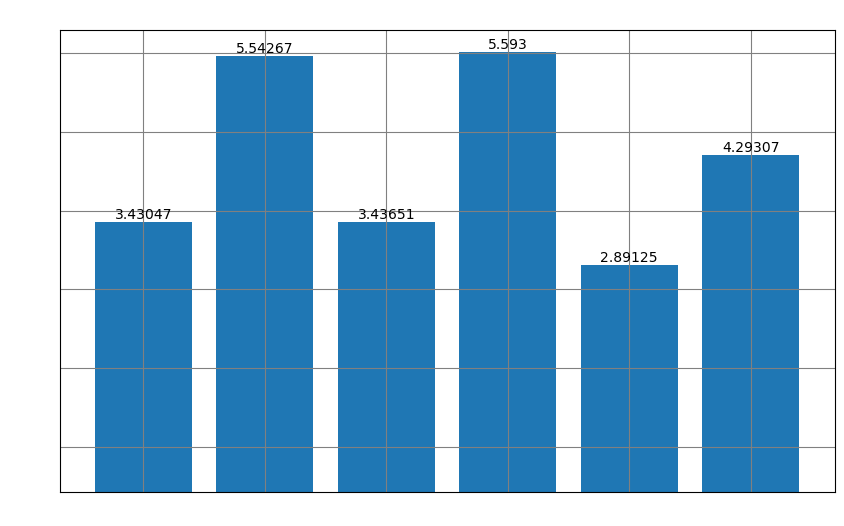

In [249]:
y = [speed_up_s_4, speed_up_s_8, speed_up_w_4, speed_up_w_8, speed_up_a_4, speed_up_a_8]
plt.title("Parallel speed-up")
fig = plt.bar(["S 4","S 8", "W 4", "W 8", "A 4", "A 8"], y)
plt.yticks(np.arange(min(y) * 0.2, max(y) * 1.1, 1))
plt.bar_label(fig, label_type="edge")
plt.show()

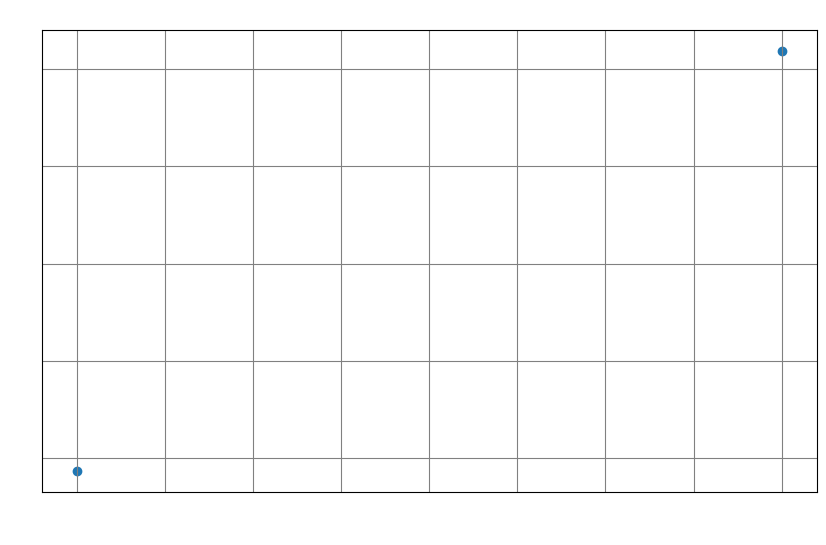

In [187]:
plt.title("Parallel speed-up W")
plt.scatter([4,8],[speed_up_w_4, speed_up_w_8])
plt.xlabel("Threads")
plt.ylabel("")
plt.show()

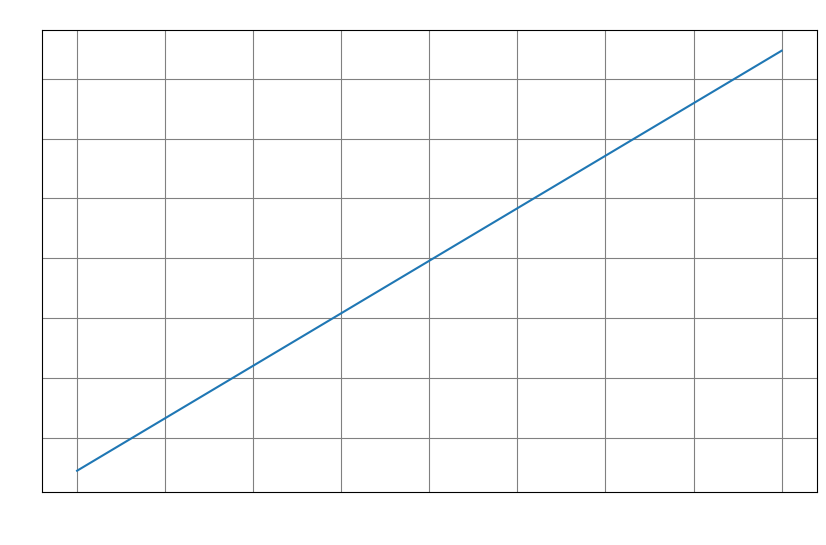

In [185]:
plt.title("Parallel speed-up A")
plt.plot([4,8],[speed_up_a_4, speed_up_a_8])
plt.xlabel("Threads")
plt.ylabel("")
plt.show()

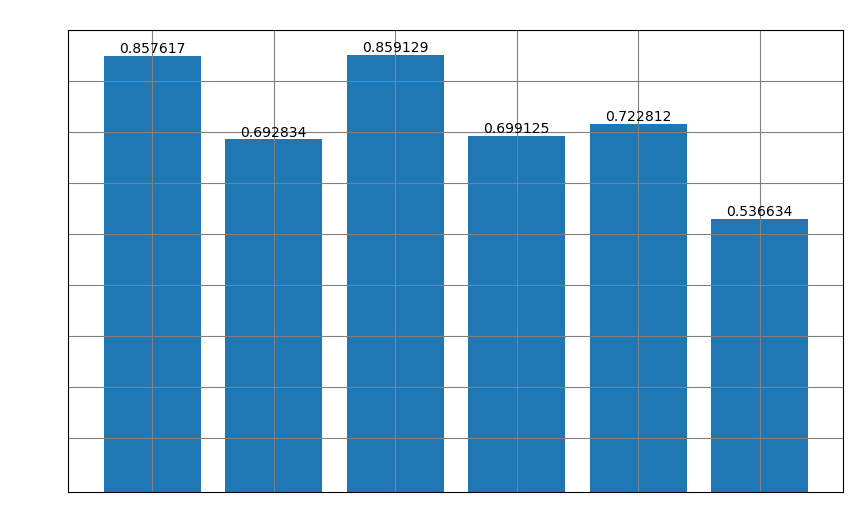

In [243]:
y = [eficiencia_s_4, eficiencia_s_8, eficiencia_w_4, eficiencia_w_8, eficiencia_a_4, eficiencia_a_8]
plt.title("Parallel eficiency")
fig = plt.bar(["S 4","S 8", "W 4", "W 8", "A 4", "A 8"], y)
plt.yticks(np.arange(min(y) * 0.2, max(y) * 1.1, 0.1))
plt.bar_label(fig, label_type="edge")
plt.show()